In [1]:
import pandas as pd
import matplotlib.pyplot as plt

points = pd.read_csv('data.csv')

def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i, 0]
        y = points.iloc[i, 1]
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(len(points)):
        x = points.iloc[i, 0]
        y = points.iloc[i, 1]
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return [m, b]

m = 0
b = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
    m, b = gradient_descent(m, b, points, L)

print(m, b)

1.4607911678007937 0.08980028357345672


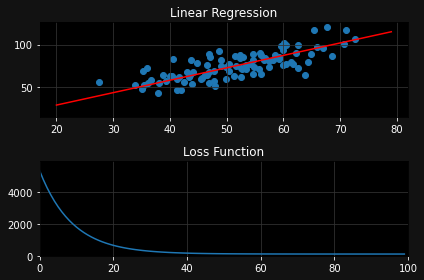

In [2]:
#Visualizing and animating
m = 0
b = 0
L = 0.00001
epochs = 100 #number of iterations to perform gradient descent

plt.ion()

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax2.set_xlim([0,epochs])
ax2.set_ylim([0,loss_function(m,b,points)])

ax1.scatter(points.iloc[:,0], points.iloc[:,1])
line, = ax1.plot(range(20, 80), range(20, 80), color='red')
line2, = ax2.plot(0,0)

xlist = []
ylist = []

for i in range(epochs):
    m, b = gradient_descent(m, b, points, L)
    line.set_ydata(m * range(20, 80) + b)

    xlist.append(i)
    ylist.append(loss_function(m, b, points))
    line2.set_xdata(xlist)
    line2.set_ydata(ylist)
    #fig.canvas.draw()

plt.ioff()

#Styling

fig.set_facecolor('#121212')
ax1.set_title('Linear Regression', color='white')
ax2.set_title('Loss Function', color='white')
ax1.grid(True, color='#323232')
ax2.grid(True, color='#323232')
ax1.set_facecolor('black')
ax2.set_facecolor('black')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
plt.tight_layout()

#ax1.scatter(points.iloc[:,0], points.iloc[:,1], color='#EF6C35')
#line, = ax1.plot(range(20, 80), range(20, 80), color='#00ABAB')
#line2, = ax2.plot(0,0, color='#00ABAB')

plt.show()

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
    
https://www.neuralnine.com/linear-regression-from-scratch-in-python/